In [1]:
%load_ext autoreload
import datetime
# import ete3
import itertools
import json
import logging
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import typing
# import re
import xml.etree.ElementTree as ET
# import xml.dom.minidom
# import xmlschema

In [128]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
from maxes.generators.xes_generator.xes_generator1 import XesGenerator1
# from maxes.xes_file import XesFile
# from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.notebooks.utils
import maxes.notebooks.load_files
import maxes.utils

In [ ]:
maxes.notebooks.utils.init_notebook() # RUN ONLY ONCE

In [53]:
file_path = maxes.notebooks.utils.get_data_path("other/simple.xes")
log = maxes.notebooks.utils.load_xes(file_path)

# log = maxes.notebooks.load_files.load_activities_detailed_labour()
df = log.traces[1].df
df

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,location,duration,outcome
0,Sydney,customer,1970-01-01 00:00:00+00:00,complete,incoming claim,NaN,NaN,NaN
1,NaN,Call Centre Agent Sydney,1970-01-01 00:00:00+00:00,start,S check if sufficient information is available,Sydney,NaN,NaN
2,NaN,Call Centre Agent Sydney,1970-01-01 00:00:21+00:00,complete,S check if sufficient information is available,Sydney,NaN,NaN
3,NaN,Call Centre Agent Sydney,1970-01-01 00:00:21+00:00,start,S register claim,NaN,NaN,NaN
4,NaN,Call Centre Agent Sydney,1970-01-01 00:01:54+00:00,complete,S register claim,NaN,NaN,NaN
5,NaN,Claims handler,1970-01-01 00:01:54+00:00,start,determine likelihood of claim,NaN,NaN,NaN
6,NaN,Claims handler,1970-01-01 00:02:05+00:00,complete,determine likelihood of claim,NaN,NaN,NaN
7,NaN,Claims handler,1970-01-01 00:02:05+00:00,start,assess claim,NaN,NaN,NaN
8,NaN,Claims handler,1970-01-01 00:04:09+00:00,complete,assess claim,NaN,NaN,NaN
9,NaN,Claims handler,1970-01-01 00:04:09+00:00,start,advise claimant on reimbursement,NaN,NaN,NaN


In [129]:
generator = XesGenerator1()
generator.fit(log)

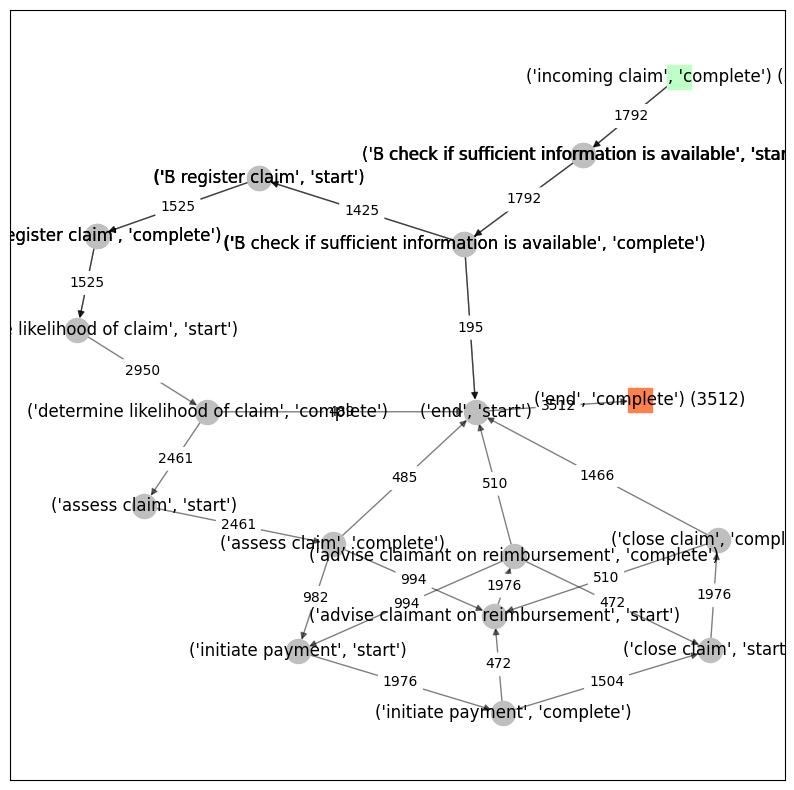

In [150]:
graph = generator.sequence_graph_

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# fig.dpi = 20
# maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.circular_layout(graph))
maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.kamada_kawai_layout(graph))

/var/folders/6l/v10sl3q532l_8l8r3yd0y_9m0000gp/T/ipykernel_3076/45475792.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trace.df = trace.df[df["lifecycle:transition"] == "start"]
/var/folders/6l/v10sl3q532l_8l8r3yd0y_9m0000gp/T/ipykernel_3076/45475792.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trace.df = trace.df[df["lifecycle:transition"] == "start"]
/var/folders/6l/v10sl3q532l_8l8r3yd0y_9m0000gp/T/ipykernel_3076/45475792.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trace.df = trace.df[df["lifecycle:transition"] == "start"]
/var/folders/6l/v10sl3q532l_8l8r3yd0y_9m0000gp/T/ipykernel_3076/45475792.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trace.df = trace.df[df["lifecycle:transition"] == "start"]
/var/folders/6l/v10sl3q532l_8l8r3yd0y_9m0000gp/T/ipykernel_3076/45475792.py:7: UserWarning: Boolean Series key will be reindexed to matc

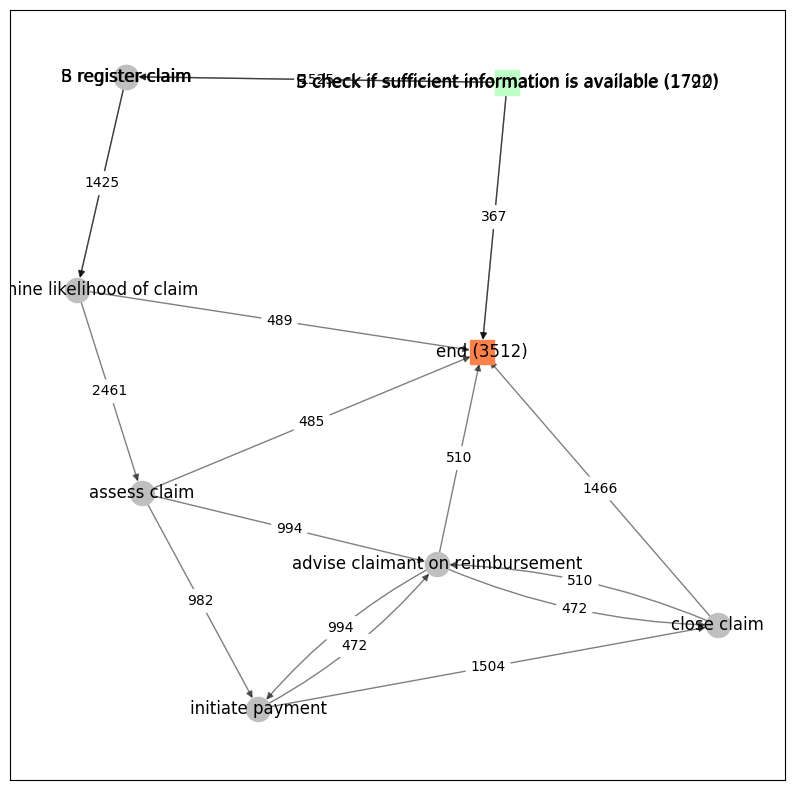

In [151]:
%autoreload
from maxes.analyze_sequence import analyze_xes_log_sequence

log__simple_filtered = maxes.notebooks.utils.load_xes(file_path)

for trace in log__simple_filtered.traces:
    trace.df = trace.df[df["lifecycle:transition"] == "start"]

graph = analyze_xes_log_sequence(log__simple_filtered)

relabel_mapping = {label: label[0] for label in graph.nodes}
nx.relabel_nodes(graph, relabel_mapping, copy=False)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# fig.dpi = 20
# maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.circular_layout(graph))
maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.kamada_kawai_layout(graph))

In [152]:
nx.kamada_kawai_layout(graph)

{'B check if sufficient information is available': array([0.25569665, 0.6759109 ]),
 'B register claim': array([-0.32033479,  0.69161324]),
 'determine likelihood of claim': array([-0.39430608,  0.12144223]),
 'end': array([ 0.2171761 , -0.04473463]),
 'S check if sufficient information is available': array([0.25590479, 0.67582098]),
 'S register claim': array([-0.32015234,  0.69161602]),
 'assess claim': array([-0.29694136, -0.42239005]),
 'advise claimant on reimbursement': array([ 0.14953405, -0.61331672]),
 'initiate payment': array([-0.12048891, -1.        ]),
 'close claim': array([ 0.57391188, -0.77596196])}

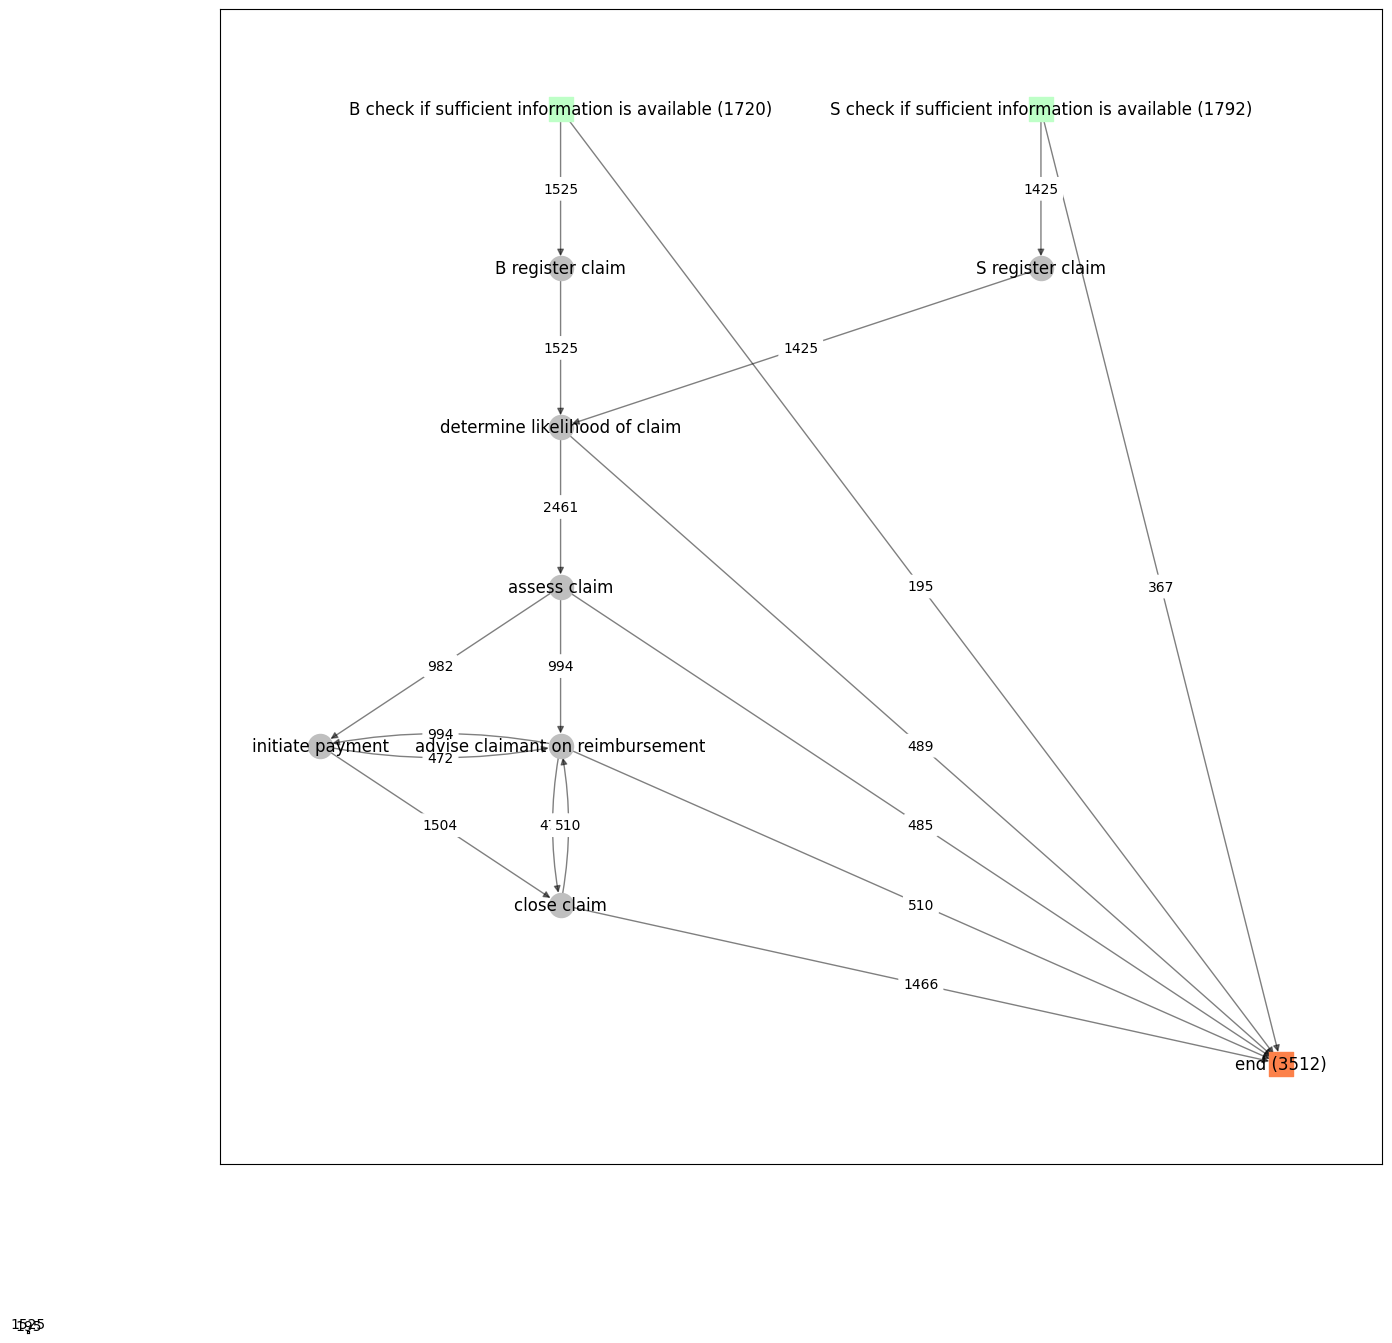

In [213]:
# for node, data in graph.nodes.items():
#     if data.get("first"):
#         data["_rendering_layer"] = 0
#     elif data.get("last"):
#         data["_rendering_layer"] = 2
#     else:
#         data["_rendering_layer"] = 1

# graph.nodes['B check if sufficient information is available']['_rendering_layer'] = 0
# graph.nodes['B register claim']['_rendering_layer'] = 1
# graph.nodes['determine likelihood of claim']['_rendering_layer'] = 2
# graph.nodes['end']['_rendering_layer'] = 6
# graph.nodes['S check if sufficient information is available']['_rendering_layer'] = 0
# graph.nodes['S register claim']['_rendering_layer'] = 1
# graph.nodes['assess claim']['_rendering_layer'] = 3
# graph.nodes['advise claimant on reimbursement']['_rendering_layer'] = 4
# graph.nodes['initiate payment']['_rendering_layer'] = 4
# graph.nodes['close claim']['_rendering_layer'] = 5

pos = {
    'B check if sufficient information is available': [0, 0],
    'B register claim': [0, -1],
    'determine likelihood of claim': [0, -2],
    'end': [3, -6],
    'S check if sufficient information is available': [2, 0],
    'S register claim': [2, -1],
    'assess claim': [0, -3],
    'advise claimant on reimbursement': [0, -4],
    'initiate payment': [-1, -4],
    'close claim': [0, -5],
}

# pos = nx.multipartite_layout(graph, subset_key="_rendering_layer")

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
# fig.dpi = 20
# maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.circular_layout(graph))
maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=pos)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def draw_event_outcomes_chances(node: str, axx):
    # ax = inset_axes(
    #     axx, width='10%', height='10%',
    #     bbox_to_anchor=[-0.6, 0.15, 0.8, 0.8],
    #     bbox_transform=axx.transAxes)
    ax = inset_axes(
        axx, width='100%', height='100%',
        bbox_to_anchor=[2, 3, 2, 2])
    data = [(node, data["frequency"]) for node, data in graph[node].items()]

    x = [i[0] for i in data]
    y = [i[1] for i in data]

    # fig, ax = plt.subplots()
    # fig.set_size_inches(2, 2)
    ax.bar(x, y, label=None)
    # ax.axis('off')
    # ax.tick_params(axis='x')
    ax.set_xticks([])
    ax.set_yticks([])

    for bar in ax.containers:
        ax.bar_label(bar)

draw_event_outcomes_chances('B check if sufficient information is available', axx=ax)

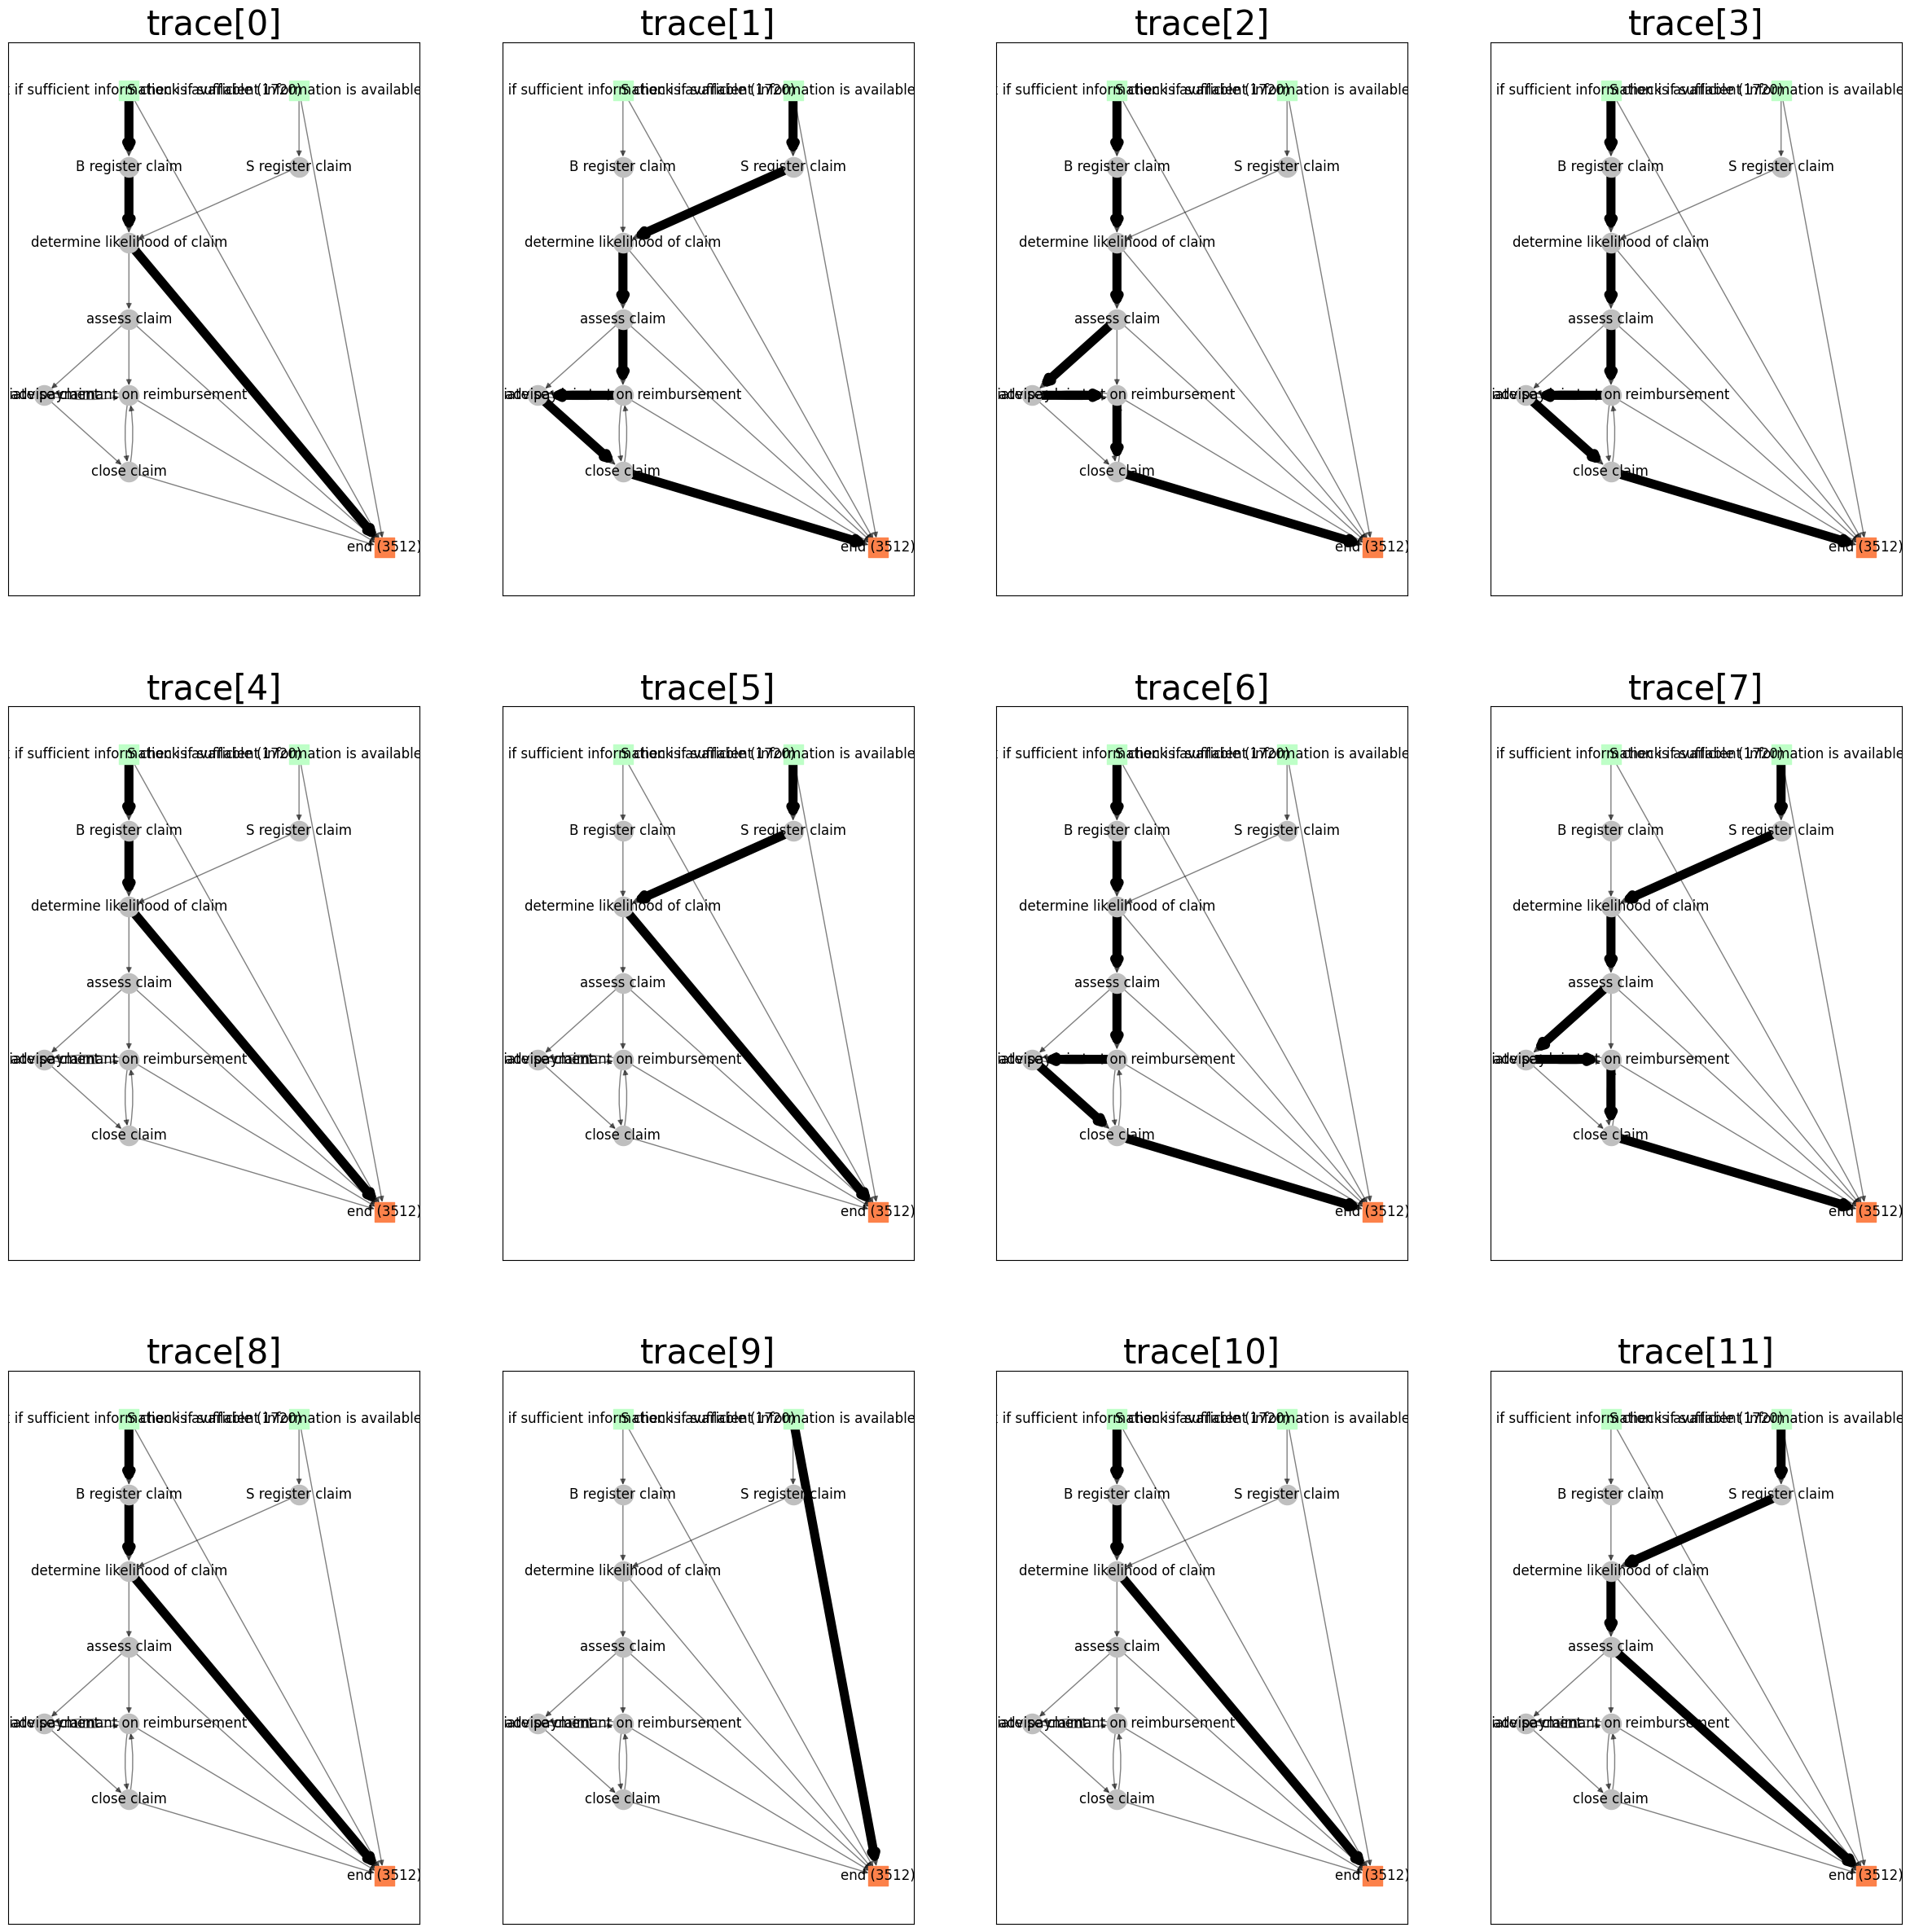

In [168]:
from maxes.analyze_sequence import analyze_xes_trace_sequence

# trace_graph = analyze_xes_trace_sequence(log__simple_filtered.traces[2].df)
# nx.relabel_nodes(trace_graph, relabel_mapping, copy=False)

# fig, ax = plt.subplots()
# fig.set_size_inches(15, 15)

# maxes.analyze_sequence.draw_nx_graph(graph, ax=ax, pos=pos)

# nx.draw_networkx_edges(trace_graph, ax=ax, pos=pos, width=5)

#

fig, axs = plt.subplots(3, 4)
fig.set_size_inches(30, 30)

for index, ax in enumerate(axs.reshape(-1)):
    trace_graph = analyze_xes_trace_sequence(log__simple_filtered.traces[index].df)
    nx.relabel_nodes(trace_graph, relabel_mapping, copy=False)

    maxes.analyze_sequence.draw_nx_graph(graph, ax=ax, pos=pos)

    nx.draw_networkx_edges(trace_graph, ax=ax, pos=pos, width=8)

    ax.set_title(f"trace[{index}]", fontsize=30)

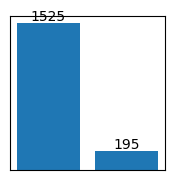

In [185]:
data = [(node, data["frequency"]) for node, data in graph['B check if sufficient information is available'].items()]

x = [i[0] for i in data]
y = [i[1] for i in data]

fig, ax = plt.subplots()
fig.set_size_inches(2, 2)
ax.bar(x, y, label=None)
# ax.axis('off')
# ax.tick_params(axis='x')
ax.set_xticks([])
ax.set_yticks([])

for bar in ax.containers:
    ax.bar_label(bar)

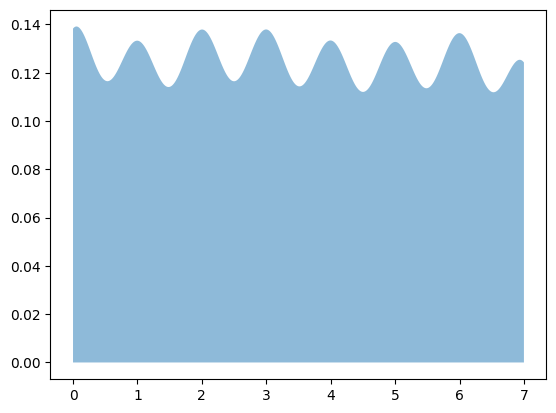

In [96]:
# KDE visualization
from sklearn.neighbors import KernelDensity

trace_beginning_timestamps_ = [trace.events[0].time_timestamp for trace in log.traces]

data_1d = [date.hour for date in trace_beginning_timestamps_]
# data_1d = [date.timestamp() for date in trace_beginning_timestamps_]
start, end = min(data_1d), max(data_1d)
x = np.linspace(start, end, 1000)

data_2d = [[date] for date in data_1d]
kde = KernelDensity(bandwidth=0.4).fit(data_2d)
y = kde.score_samples(x[:, None])

plt.fill_between(x, np.exp(y), alpha=0.5)

In [92]:
trace_beginning_timestamps_[2000].hour

6

In [97]:
# KDE visualization
%autoreload
from maxes.generators.xes_generator.xes_generator1 import KdeForTimeStamps1
from sklearn.neighbors import KernelDensity

trace_beginning_timestamps_ = [trace.events[0].time_timestamp for trace in log.traces]
self.trace_beginning_timestamp_generator_ = KdeForTimeStamps1().fit(trace_beginning_timestamps_)


data_1d = [date.timestamp() for date in trace_beginning_timestamps_]
start, end = min(data_1d), max(data_1d)

data_2d = [[date] for date in data_1d]
kde = sklearn.neighbors.KernelDensity().fit(data_2d)

start, end = generator.trace_beginning_timestamp_generator_.min_max_range_
x = np.linspace(start - 100, end + 100, 1000)

kde = generator.trace_beginning_timestamp_generator_.kde_
y = kde.score_samples(x[:, None])
# y = kde.score_samples(x[:, None])

plt.fill_between(x, np.exp(y), alpha=0.5)

NameError: name 'self' is not defined

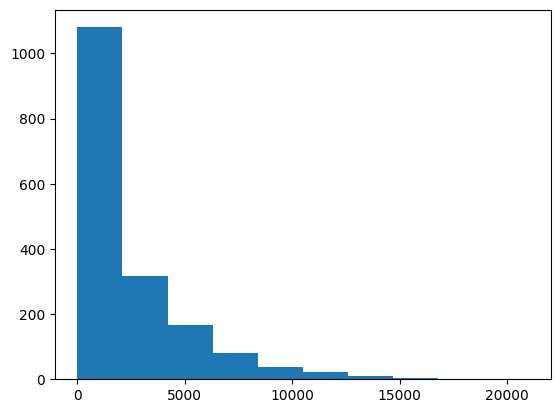

In [107]:
edges = list(generator.sequence_graph_.edges())
edge = edges[0]
transition_durations = generator.sequence_graph_.edges[edge]["transition_durations"]
seconds = [duration.seconds for duration in transition_durations]

# seconds_series = pd.Series(seconds)
# seconds_series.describe()

plt.hist(seconds);

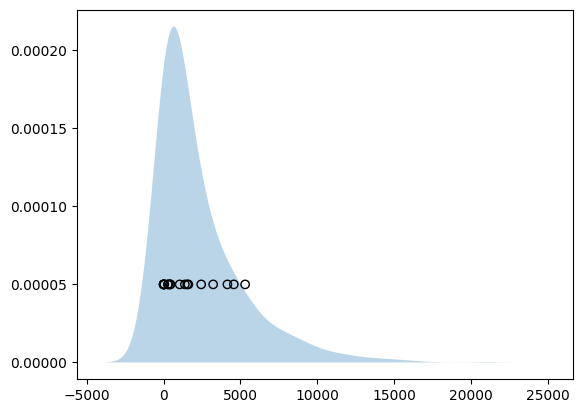

In [149]:
model = generator.sequence_graph_.edges[edge]["duration_generator"]

start, end = min(seconds), max(seconds)
interval_length = end - start
interval_expansion = interval_length * 0.2
x = np.linspace(start - interval_expansion, end + interval_expansion, 1000)

y = np.exp(model.kde_.score_samples(x[:, None]))

plt.fill_between(x, y, alpha=0.3);

samples_x = [sample.seconds for sample in model.sample(n_samples=20)]
samples_y = [0.00005 for sample in samples_x]
# samples_y
plt.scatter(samples_x, samples_y, facecolors='none', edgecolors='black')